In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
df=pd.read_csv("/content/drive/MyDrive/IMDb Movies India.csv", encoding='ISO-8859-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
#Handling Missing Values in Votes

df['Votes'] = df['Votes'].astype(str).str.replace(r'\D', '', regex=True)


df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


df['Votes'].fillna(df['Votes'].mean(), inplace=True)


print(df['Votes'].head())

0    1938.340783
1       8.000000
2    1938.340783
3      35.000000
4    1938.340783
Name: Votes, dtype: float64


In [7]:
#Droping NaN values in Rating

df=df.dropna(subset=['Rating'])

In [8]:
df["Duration"]=df['Duration'].str.extract('(\d+)').astype(float)

In [9]:
df["Duration"]=df["Duration"].fillna(df["Duration"].mean(), inplace=True)

In [10]:
c_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'] #Categorical Columns

# One-Hot Encoding
ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
transformed_data = ohe.fit_transform(df[c_columns])
feature_names = ohe.get_feature_names_out(c_columns)
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

# Droping original categorical columns and concatenate transformed DataFrame
df = df.drop(c_columns, axis=1)
df = pd.concat([df, transformed_df], axis=1)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
X=df.drop(columns=["Rating"])
y=df["Rating"]

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X

,Name,Year,Duration,Votes,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family",...,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed,Actor 3_nan
1,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,827.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#RandomForest
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_test,y_test)

RandomForestRegressor(random_state=42)

In [15]:
y_pred=rf_model.predict(X_test)

In [23]:
#Evaluating RandomForest
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print("MSE: ",mse)
print("r2: ",r2)

MSE:  0.44805820132371416
r2:  0.9439997146492102


In [17]:
rf_model.score(X_test,y_test)*100

94.86000162898655

In [18]:
joblib.dump(rf_model, 'best_model.pkl')

['best_model.pkl']

In [19]:
model1=joblib.load("best_model.pkl")

y_pred1=model1.predict(X_test)

In [20]:
#evaluating Model

model_mse=mean_squared_error(y_pred1,y_test)
model_r2=r2_score(y_pred1,y_test)

print("Model_MSE: ",model_mse)
print("Model_r2: ",model_r2)

Model_MSE:  0.44805820132371416
Model_r2:  0.9439997146492102


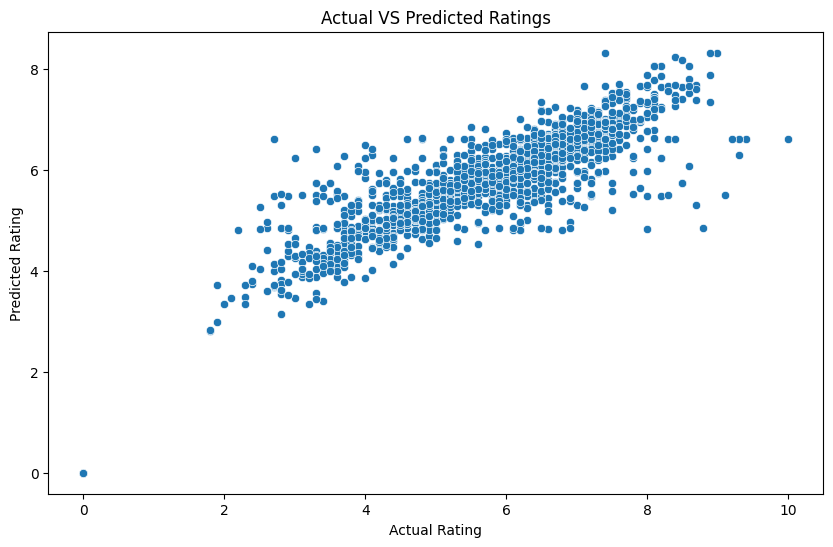

In [21]:
#visualizing the Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred1)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual VS Predicted Ratings")
plt.show()